In [2]:
# Works best with jupyter-notebook

In [1]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import math
import numpy as np

import roboticstoolbox as rtb
from roboticstoolbox import ETS as ets

from spatialmath.base import *
import spatialmath.base.symbolic as sym

import matplotlib.pyplot as plt
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# Lecture 5.2

To start, let's create a 2-joint planar robot model 

In [2]:
#import 2-joint planar robot model
robot = rtb.models.DH.Planar2()
print(robot)

┏━━━━┳━━━━━┳━━━━┳━━━━━━┓
┃θⱼ  ┃ dⱼ  ┃ aⱼ ┃  ⍺ⱼ  ┃
┣━━━━╋━━━━━╋━━━━╋━━━━━━┫
┃ q1 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┃ q2 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┗━━━━┻━━━━━┻━━━━┻━━━━━━┛

┌─────┬──────┬──────┐
│name │ q0   │ q1   │
├─────┼──────┼──────┤
│  qz │  0°  │  0°  │
│  q1 │  0°  │  90° │
│  q2 │  90° │ -90° │
└─────┴──────┴──────┘



Evaluate an ETS with joint coordinate substitution:
eval(self, q=None, unit='rad')

Create variables a1,a2 and q1,q2. These variables represent the links lengths and joint angles.

In [3]:
# Links 
a1=1
a2=1

# Angles
q1=0
q2=math.pi/2

robot.addconfiguration("q", [q1, q2])

To create a homogenous transformation matrix that represents the 2-joint robot end effector pose, we need to provide the chain of transformations joint angles q and link distances a.

In [4]:
e = ets.rz(q1)*ets.tx(a1)*ets.rz(q2)*ets.tx(a2)
print(e)
e.eval(robot.q)

Rz(0°) * tx(1) * Rz(90°) * tx(1)


SE3:   0          -1           0           1            
       1           0           0           1            
       0           0           1           0            
       0           0           0           1            
    

### Symbolic Representations

To create a symbolic representation of the homogenous transformation matrix, use the symoblix module as follows

In [5]:
a1 = sym.symbol('a1')
q1 = sym.symbol('q1')
a2 = sym.symbol('a2')
q2 = sym.symbol('q2')

e = ets.rz(q1)*ets.tx(a1)*ets.rz(q2)*ets.tx(a2)
print(e)

Rz(q1) * tx(a1) * Rz(q2) * tx(a2)


In [6]:
e.T()
e.eval().A

array([[-sin(q1)*sin(q2) + cos(q1)*cos(q2), -sin(q1)*cos(q2) - sin(q2)*cos(q1), 0,
        a1*cos(q1) + a2*(-sin(q1)*sin(q2) + cos(q1)*cos(q2))],
       [sin(q1)*cos(q2) + sin(q2)*cos(q1), -sin(q1)*sin(q2) + cos(q1)*cos(q2), 0,
        a1*sin(q1) + a2*(sin(q1)*cos(q2) + sin(q2)*cos(q1))],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=object)

We can set the robot with an initial joint angle configureation and then use teach2() (2D) and teach (3D) to start

<IPython.core.display.Javascript object>


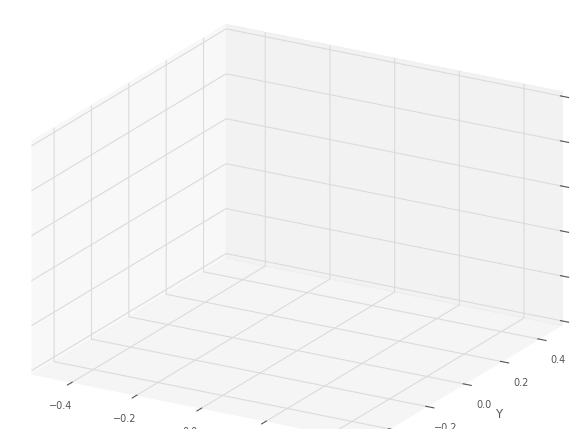

RuntimeError: cannot use teach panel under Jupyter

In [7]:
import matplotlib; #matplotlib.use("nbAgg") 
from mpl_toolkits.mplot3d import Axes3D

robot.q=[0, np.pi/2]
#e = robot.teach2()
#Try outside of notebook 
e = robot.teach()

Notice, that we can reach the same configuration from a different set of angles. I.e. there are 2 solutions for each position

<IPython.core.display.Javascript object>


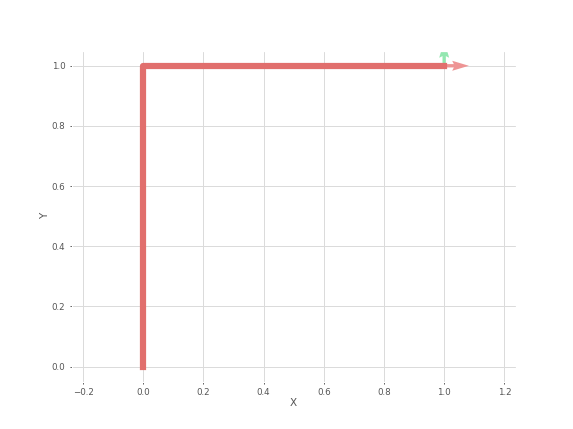

In [8]:
robot.q=[np.pi/2, -np.pi/2]
robot.plot2(robot.q)
# Try outside of notebook: robot.plot(robot.q)

### A 2D Robot Model

We can also import the model of a planar 2 robot (1 DoF robot not available in the rtb toolbox)

In [ ]:
robot = rtb.models.DH.Planar2()
print(robot)

The model has many interesting methods. One of which let's you interact with the robot directly in 2D or 3D.

In [ ]:
import matplotlib; matplotlib.use("nbAgg") #THIS IS THE MAGIC 
from mpl_toolkits.mplot3d import Axes3D
#e = robot.teach2()
e = robot.teach()